In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df_tsa = pd.read_csv('tsa_claims_ujian.csv')

In [3]:
df_tsa.head()

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
0,0909816M,7-Feb-02,1/6/2003 0:00,MIA,Miami International Airport,American Airlines,Property Damage,Checkpoint,Luggage (all types including footlockers),$50.00,Approved,$50.00,Approve in Full
1,14268,20-Jun-02,6/16/2002 0:00,PHX,Phoenix Sky Harbor International,NaN,Property Damage,Checkpoint,Computer - Laptop,$2;270.09,Canceled,NaN,NaN
2,15242,12-Jul-02,5/31/2002 0:00,BWI,Baltimore/Washington Intl Thurgood Marshall,American Airlines,NaN,Other,Luggage (all types including footlockers),$200.00,Denied,$0.00,Deny
3,16759,21-Aug-02,7/12/2002 0:00,BWI,Baltimore/Washington Intl Thurgood Marshall,Southwest Airlines,Passenger Property Loss,Checkpoint,Other,$21.44,Approved,$21.00,Approve in Full
4,17846,9-Sep-02,8/30/2002 0:00,BOS,Boston (Logan) International Airport,NaN,Property Damage,Checkpoint,Luggage (all types including footlockers),$1;832.22,Canceled,$0.00,NaN


In [4]:
df_tsa.tail()

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
51061,2015110926685,22-Oct-15,19-Oct-15,-,-,-,Property Damage,Checked Baggage,Baggage/Cases/Purses,-,-,NaN,NaN
51062,2015110226479,2-Nov-15,2-Nov-15,-,-,-,Passenger Property Loss,Checkpoint,Books; Magazines & Other,-,-,NaN,NaN
51063,2015120727336,16-Nov-15,14-Sep-15,-,-,American Airlines,Passenger Property Loss,Checked Baggage,Cosmetics & Grooming,-,-,NaN,NaN
51064,2015120427297,20-Nov-15,16-Oct-15,-,-,-,Property Damage,Checked Baggage,Baggage/Cases/Purses; Books; Magazines & Other...,-,-,NaN,NaN
51065,2016010428072,22-Dec-15,20-Dec-15,-,-,-,Passenger Property Loss,Checked Baggage,Clothing,-,-,NaN,NaN


In [5]:
df_tsa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51066 entries, 0 to 51065
Data columns (total 13 columns):
Claim Number     51066 non-null object
Date Received    50996 non-null object
Incident Date    50496 non-null object
Airport Code     49014 non-null object
Airport Name     49014 non-null object
Airline Name     42511 non-null object
Claim Type       49106 non-null object
Claim Site       50876 non-null object
Item             50054 non-null object
Claim Amount     50074 non-null object
Status           51065 non-null object
Close Amount     33786 non-null object
Disposition      32846 non-null object
dtypes: object(13)
memory usage: 5.1+ MB


In [6]:
df_tsa.describe()

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
count,51066,50996,50496,49014,49014,42511,49106,50876,50054,50074,51065,33786,32846
unique,51065,3522,10788,405,419,243,8,6,1854,13248,13,6009,3
top,2013121110011,27-May-04,12/22/2004 0:00,LAX,John F. Kennedy International,American Airlines,Passenger Property Loss,Checked Baggage,Other,$0.00,Denied,$0.00,Deny
freq,2,182,43,2379,2286,4377,29713,39937,9183,7065,17134,17907,17147


In [7]:
tsaDesc = []
for i in df_tsa.columns:
    tsaDesc.append([i,
                     df_tsa[i].dtypes,
                     df_tsa[i].isna().sum(),
                     round((((df_tsa[i].isna().sum())/(len(df_tsa)))*100),2),
                     df_tsa[i].nunique(),
                     df_tsa[i].drop_duplicates().sample(2).values])
    
pd.DataFrame(tsaDesc, columns = ['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'])

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,Claim Number,object,0,0.00,51065,"[1117468M, 2008042243121]"
1,Date Received,object,70,0.14,3522,"[4-Nov-12, 13-Dec-04]"
2,Incident Date,object,570,1.12,10788,"[10/13/2007 0:00, 6/6/2013 13:45]"
3,Airport Code,object,2052,4.02,405,"[TPA, MKG]"
4,Airport Name,object,2052,4.02,419,"[Athens/Ben Epps, Fayetteville Regional]"
5,Airline Name,object,8555,16.75,243,"[Cape Air , Mountain West]"
6,Claim Type,object,1960,3.84,8,"[Motor Vehicle, Passenger Theft]"
7,Claim Site,object,190,0.37,6,"[nan, Checked Baggage]"
8,Item,object,1012,1.98,1854,[Eyeglasses - (including contact lenses); Lugg...
9,Claim Amount,object,992,1.94,13248,"[$745.31 , $13.20 ]"


In [8]:
df_tsa.replace('-', np.nan, inplace = True)

In [9]:
df_tsa['Date Received'] = pd.to_datetime(df_tsa['Date Received'], errors = 'coerce')

In [10]:
# df_err = df_tsa[(df_tsa['Incident Date'])]

In [11]:
def change_date(row):
    if str(row['Incident Date']) != 'nan':
        if (len(str(row['Incident Date'])) >= 17) and (row['Incident Date'][7] == '0'):
            new = row['Incident Date'][:7] + str(row['Date Received'].year) + row['Incident Date'][11:]
            return new
        else:
            return row
        
    else:
        return row
        
df_tsa['Incident Date'] = df_tsa[['Incident Date', 'Date Received']].apply(change_date, axis = 1)

In [12]:
# df_tsa['Incident Date'][13729][:]
df_tsa['Incident Date'] = pd.to_datetime(df_tsa['Incident Date'])

In [13]:
df_tsa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51066 entries, 0 to 51065
Data columns (total 13 columns):
Claim Number     51066 non-null object
Date Received    50996 non-null datetime64[ns]
Incident Date    50496 non-null datetime64[ns]
Airport Code     48915 non-null object
Airport Name     48915 non-null object
Airline Name     41470 non-null object
Claim Type       49035 non-null object
Claim Site       50817 non-null object
Item             48918 non-null object
Claim Amount     46886 non-null object
Status           47877 non-null object
Close Amount     33786 non-null object
Disposition      32846 non-null object
dtypes: datetime64[ns](2), object(11)
memory usage: 5.1+ MB


In [14]:
# SHOW THE ERROR AGAIN!


In [15]:
df_tsa['Day Differences'] = df_tsa['Date Received'] - df_tsa['Incident Date']
df_tsa['Day Differences'] = df_tsa['Day Differences'].dt.days

Text(0.5, 1.0, 'Day Differences Distribution')

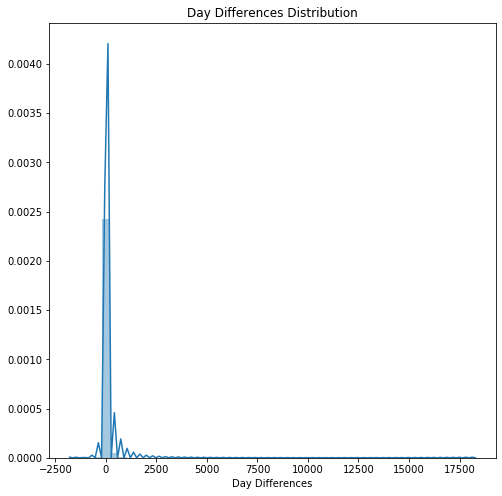

In [16]:
import seaborn as sns
plt.figure(figsize = (8,8))
sns.distplot(df_tsa['Day Differences'].dropna())
plt.title('Day Differences Distribution')

Text(0.5, 1.0, 'Day Differences Distribution less than 0')

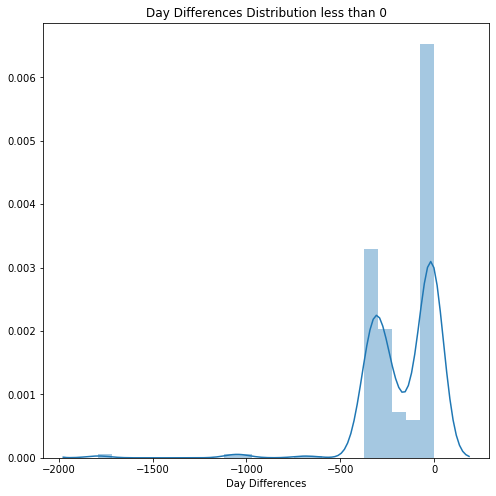

In [17]:
plt.figure(figsize = (8,8))
day_less = df_tsa[(df_tsa['Day Differences'] < 0)]
sns.distplot(day_less['Day Differences'].dropna())
plt.title('Day Differences Distribution less than 0')

Text(0.5, 1.0, 'Day Differences Distribution over than 1000')

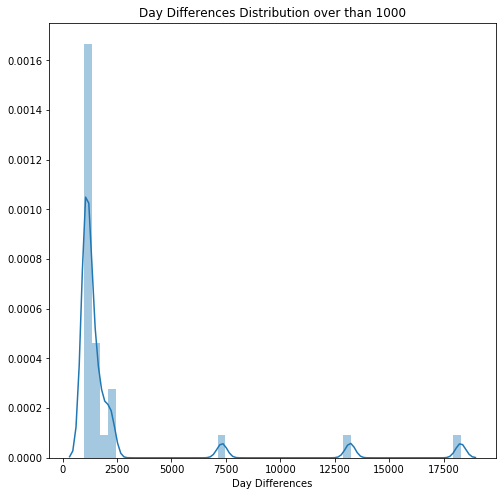

In [18]:
plt.figure(figsize = (8,8))
day_more = df_tsa[(df_tsa['Day Differences'] > 1000)]
sns.distplot(day_more['Day Differences'].dropna())
plt.title('Day Differences Distribution over than 1000')

## Question

Why do you think there is day that way more than thousand days differences, and why some day differences are less than 0? (claim was made before the incident is like someone predicting a future after all).

#### Answer:


I think there are negative values in the day differences maybe possible due to human error during the input of data, where the Date Received was supposed to be the Incident Date and vice versa.

In [19]:
# Remove $ sign and ;

def remove_sign(cols):
    cols = str(cols)
    if cols != 'nan':
        cols = cols.replace('$', '')
        cols = cols.replace(';', '')
        return cols
    else:
        return cols

df_tsa['Claim Amount'] = df_tsa['Claim Amount'].apply(remove_sign).astype('float64')
df_tsa['Close Amount'] = df_tsa['Close Amount'].apply(remove_sign).astype('float64')

In [20]:
df_tsa['Amount Differences'] = df_tsa['Claim Amount'] - df_tsa['Close Amount']

In [21]:
df_tsa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51066 entries, 0 to 51065
Data columns (total 15 columns):
Claim Number          51066 non-null object
Date Received         50996 non-null datetime64[ns]
Incident Date         50496 non-null datetime64[ns]
Airport Code          48915 non-null object
Airport Name          48915 non-null object
Airline Name          41470 non-null object
Claim Type            49035 non-null object
Claim Site            50817 non-null object
Item                  48918 non-null object
Claim Amount          46886 non-null float64
Status                47877 non-null object
Close Amount          33786 non-null float64
Disposition           32846 non-null object
Day Differences       50460 non-null float64
Amount Differences    33470 non-null float64
dtypes: datetime64[ns](2), float64(4), object(9)
memory usage: 5.8+ MB


In [22]:
df_tsa.head()

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition,Day Differences,Amount Differences
0,0909816M,2002-02-07,2003-01-06,MIA,Miami International Airport,American Airlines,Property Damage,Checkpoint,Luggage (all types including footlockers),50.00,Approved,50.0,Approve in Full,-333.0,0.00
1,14268,2002-06-20,2002-06-16,PHX,Phoenix Sky Harbor International,NaN,Property Damage,Checkpoint,Computer - Laptop,2270.09,Canceled,NaN,NaN,4.0,NaN
2,15242,2002-07-12,2002-05-31,BWI,Baltimore/Washington Intl Thurgood Marshall,American Airlines,NaN,Other,Luggage (all types including footlockers),200.00,Denied,0.0,Deny,42.0,200.00
3,16759,2002-08-21,2002-07-12,BWI,Baltimore/Washington Intl Thurgood Marshall,Southwest Airlines,Passenger Property Loss,Checkpoint,Other,21.44,Approved,21.0,Approve in Full,40.0,0.44
4,17846,2002-09-09,2002-08-30,BOS,Boston (Logan) International Airport,NaN,Property Damage,Checkpoint,Luggage (all types including footlockers),1832.22,Canceled,0.0,NaN,10.0,1832.22


Text(0.5, 1.0, 'Amount Differences Distribution')

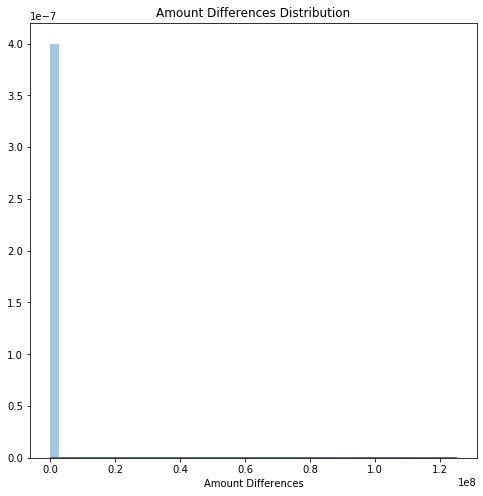

In [23]:
plt.figure(figsize = (8,8))
sns.distplot(df_tsa['Amount Differences'].dropna())
plt.title('Amount Differences Distribution')

In [24]:
Q1 = df_tsa['Amount Differences'].quantile(0.25)
Q3 = df_tsa['Amount Differences'].quantile(0.75)
IQR = Q3 - Q1
df_tsa_out = df_tsa[((df_tsa['Amount Differences'] < Q1-(1.5*IQR)) | (df_tsa['Amount Differences'] > Q3+(1.5*IQR)))]
df_tsa_out

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition,Day Differences,Amount Differences
4,17846,2002-09-09,2002-08-30 00:00:00,BOS,Boston (Logan) International Airport,NaN,Property Damage,Checkpoint,Luggage (all types including footlockers),1832.22,Canceled,0.00,NaN,10.0,1832.22
13,19133,2002-10-02,2002-08-22 00:00:00,CLE,Cleveland Hopkins International,Northwest Airlines,NaN,Other,Computer - Laptop,2000.00,Denied,0.00,Deny,41.0,2000.00
21,18614,2002-10-17,2002-09-14 00:00:00,MCO,Orlando International Airport,American Airlines,Property Damage,Checkpoint,Computer - Laptop,2000.00,Settled,600.00,Settle,33.0,1400.00
23,18356,2002-10-23,2002-09-18 00:00:00,LGA,LaGuardia,NaN,NaN,Checkpoint,Computer - Laptop,1801.99,Settled,291.67,Settle,35.0,1510.32
27,21817,2002-10-29,2002-10-05 00:00:00,MCO,Orlando International Airport,Delta Air Lines,NaN,Other,Other,7500.00,Denied,0.00,Deny,24.0,7500.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36208,2009123167012,2009-12-29,2009-12-18 00:00:00,MIA,Miami International Airport,American Airlines,Property Damage,Checked Baggage,NaN,2200.00,Denied,0.00,Deny,11.0,2200.00
36210,2009123167017,2009-12-29,2009-12-02 15:30:00,JFK,John F. Kennedy International,KLM Royal Dutch Airlines,Passenger Property Loss,Checked Baggage,Clothing - Shoes; belts; accessories; etc.; Co...,900.00,Denied,0.00,Deny,26.0,900.00
36213,2010010867323,2009-12-29,2009-12-21 15:15:00,CVG,Cincinnati/Northern Kentucky International,Delta Air Lines,Property Damage,Checkpoint,Computer - Laptop,1240.00,Denied,0.00,Deny,7.0,1240.00
36225,2009123066912,2009-12-30,2009-12-15 00:00:00,GSO,Piedmont Triad International Airport,Delta Air Lines,Property Damage,Checked Baggage,NaN,2300.00,Denied,0.00,Deny,15.0,2300.00


In [25]:
 df_tsa_out['Claim Amount'].describe()

count    4.103000e+03
mean     4.164579e+04
std      1.954354e+06
min      8.510100e+02
25%      1.214375e+03
50%      1.821750e+03
75%      3.000000e+03
max      1.250000e+08
Name: Claim Amount, dtype: float64

In [26]:
 df_tsa_out['Close Amount'].describe()

count     4103.000000
mean       114.613646
std        686.521806
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      20000.000000
Name: Close Amount, dtype: float64

## Question
I assume that many of this big differences happen because these people tend to request for bigger money than what it should be. Do you agree or disagree with my assumption (With an assumption that not outlier is have normal amount differences and outlier have a really big amount differences)? why? Try to explain it with the data 

In [27]:
def true_false(row):
    if str(row['Claim Amount']) != 'nan':
        if str(row['Close Amount']) != 'nan':
            if row['Claim Amount'] > row['Close Amount']:
                return 'True'
            else:
                return 'False'
        else:
            return row
    else:
        return row

df_tsa_out['T/F'] = df_tsa_out.apply(true_false, axis = 1)

C:\Users\N46VB\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


Denied                          3450
Settled                          413
Canceled                         178
Closed as a contractor claim      60
Approved                           2
Name: Status, dtype: int64


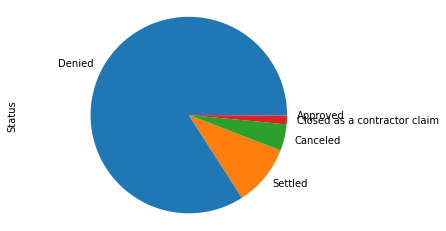

True    4103
Name: T/F, dtype: int64


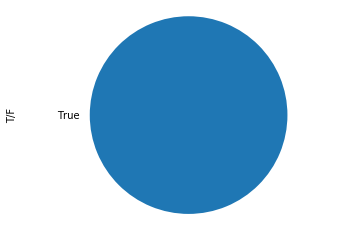

In [28]:
print(df_tsa_out['Status'].value_counts())
type_count= df_tsa_out['Status'].value_counts()
type_count.plot(kind='pie')
plt.axis('equal')
plt.show()
print(df_tsa_out['T/F'].value_counts())
type_count= df_tsa_out['T/F'].value_counts()
type_count.plot(kind='pie')
plt.axis('equal')
plt.show()

In [29]:
df_tsa_out.drop('T/F', axis = 1, inplace = True)
df_tsa_out[df_tsa_out['Status']=='Approved']

C:\Users\N46VB\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition,Day Differences,Amount Differences
7790,0329800M,2004-03-29,2004-02-19,BOS,Boston (Logan) International Airport,NaN,Passenger Property Loss,Checked Baggage,DVD/CD Players,1739.0,Approved,250.0,Approve in Full,39.0,1489.0
9774,2004081261270,2004-07-09,2004-07-10,SAN,San Diego International,Jet Blue,Passenger Theft,Checked Baggage,Jewelry - Fine,1565.0,Approved,0.0,Approve in Full,-1.0,1565.0


### Answer

- I agree with the statement, the Claim Amount is always higher than the Close Amount. 
- I have made a new column to find out whether or not this was true, as it turns out all of the data is True to have higher Claim Amount than the Close Amount. 
- The data presented from Status also shows that most of the items being claimed are declined by the TSA. Only two items are approved so far, they are jewelry and electronic device.

# Analysis
## Question
1. Is there Any relationship between the Airport and/or the Airline with the number of the claim that happen and the Claim Type? Also why is there a NaN in the Claim Type column?

2. If you realize, there is many different classes in the Status and Disposition column. What pattern you could find in these 2 columns because of this classes variation? is there any relation with the other columns?

In [30]:
df_tsa_out['Claim Type'].describe()

count                        3958
unique                          6
top       Passenger Property Loss
freq                         3063
Name: Claim Type, dtype: object

In [31]:
df_tsa_out['Airline Name'].value_counts()

Delta Air Lines         534
American Airlines       534
UAL                     379
Continental Airlines    332
Southwest Airlines      301
                       ... 
Cayman Airlines           1
Emirates                  1
Thai Airways              1
Copa Airlines             1
Air China                 1
Name: Airline Name, Length: 93, dtype: int64

Text(0.5, 1.0, 'Airline Name')

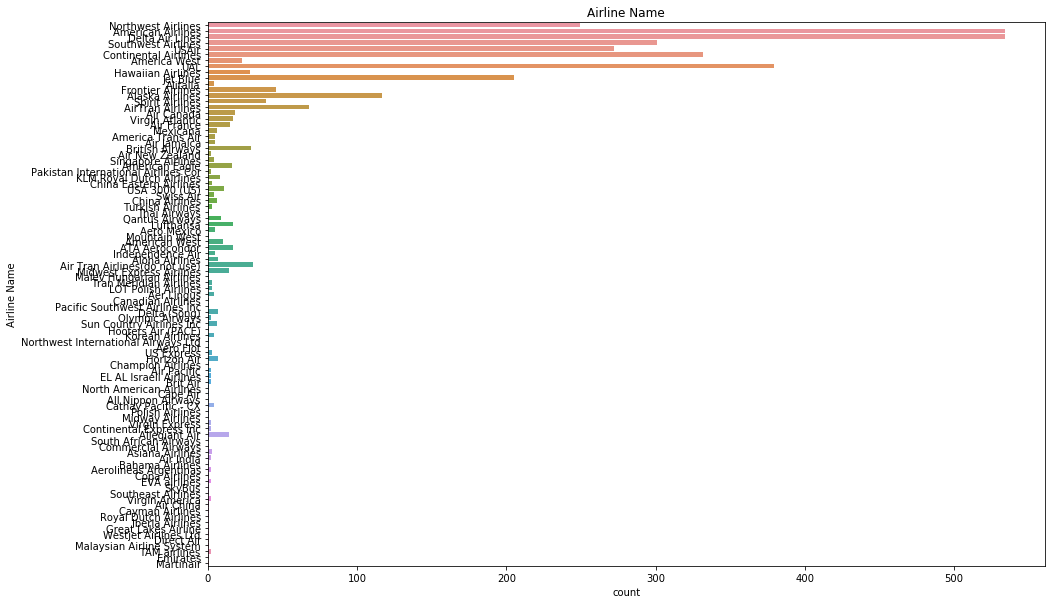

In [32]:
plt.figure(figsize=(15,10))
ax = sns.countplot(y='Airline Name', data=df_tsa_out)
# ax.set_yticklabels(ax.get_yticklabels(), rotation=40, ha="right")
plt.title('Airline Name')

Passenger Property Loss    3063
Property Damage             740
Personal Injury             127
Passenger Theft              13
Motor Vehicle                 8
Employee Loss (MPCECA)        7
Name: Claim Type, dtype: int64


Text(0.5, 1.0, 'Claim Type')

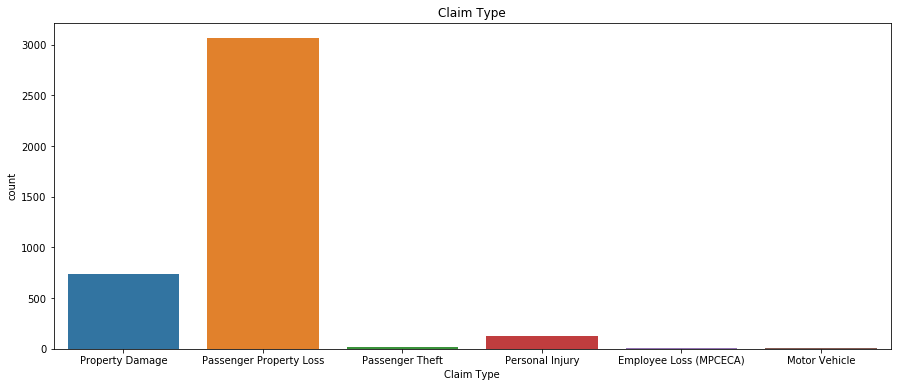

In [33]:
print(df_tsa_out['Claim Type'].value_counts())
plt.figure(figsize=(15,6))
ax = sns.countplot(x='Claim Type', data=df_tsa_out)
# ax.set_yticklabels(ax.get_yticklabels(), rotation=40, ha="right")
plt.title('Claim Type')

American Airlines     4
Southwest Airlines    2
UAL                   1
America West          1
Jet Blue              1
Virgin Atlantic       1
Northwest Airlines    1
Name: Airline Name, dtype: int64


Text(0.5, 1.0, 'Airline Name based on Passenger Property Loss')

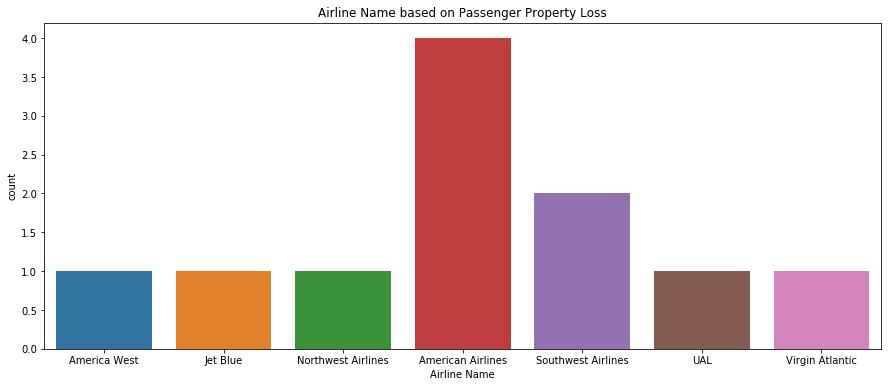

In [34]:
theft_df = df_tsa_out[(df_tsa_out['Claim Type'] == 'Passenger Theft')]

print(theft_df['Airline Name'].value_counts())
plt.figure(figsize=(15,6))
ax = sns.countplot(x='Airline Name', data=theft_df)
# ax.set_yticklabels(ax.get_yticklabels(), rotation=40, ha="right")
plt.title('Airline Name based on Passenger Property Loss')

### Answer #1
- From the bar graph above, TSA has the most claims using American Airlines and Delta Air Lines both at 534 claims. The least claims valued at 1 claim and some of them are claims using the Air China, Royal Dutch Airlines, etc.
- As for the Nan values, I think there are items that are not categorized by the TSA in their catalog, therefore there are Nan values, as there are no suitable categories.
- From the Data and the graph plotted above there are no correlation found between the airline being operated and the Claim Type.

In [35]:
df_tsa_out['Disposition'].value_counts()

Deny               3450
Settle              413
Approve in Full       2
Name: Disposition, dtype: int64

In [36]:
df_tsa_out[(df_tsa_out['Disposition'] == 'Approve in Full') & (df_tsa_out['Close Amount']==0)]

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition,Day Differences,Amount Differences
9774,2004081261270,2004-07-09,2004-07-10,SAN,San Diego International,Jet Blue,Passenger Theft,Checked Baggage,Jewelry - Fine,1565.0,Approved,0.0,Approve in Full,-1.0,1565.0


### Answer #2
- From the data given, only two Status have been approved and from that approvement it is approved in Full by the TSA according to the previous desrciption.
- Those Status that are 'Settled' are those that have a value in the column Close Amount, whereas those without any value in the Close Amount are denied. This also means that the TSA only Settles claim that have a Close Amount value.
- There is one data that is Settled without the Close Amount, Claim Number 2004081261270 has been Approved in Full without Close Amount

### Insights

In [37]:
df_tsa_out['month'] = df_tsa_out['Incident Date'].dt.month

C:\Users\N46VB\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [38]:
def month(cols):
    if cols == 1:
        return 'January'
    if cols == 2:
        return 'February'
    if cols == 3:
        return 'March'
    if cols == 4:
        return 'April'
    if cols == 5:
        return 'May'
    if cols == 6:
        return 'June'
    if cols == 7:
        return 'July'
    if cols == 8:
        return 'August'
    if cols == 9:
        return 'September'
    if cols == 10:
        return 'October'
    if cols == 11:
        return 'November'
    if cols == 12:
        return 'December'
    
df_tsa_out['month_name'] = df_tsa_out['month'].apply(month)

C:\Users\N46VB\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


August       389
March        382
January      375
July         366
October      365
December     352
April        326
May          324
June         318
November     308
September    305
February     285
Name: month_name, dtype: int64


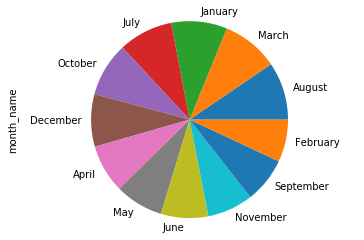

In [39]:
print(df_tsa_out['month_name'].value_counts())
type_count= df_tsa_out['month_name'].value_counts()
type_count.plot(kind='pie')
plt.axis('equal')
plt.show()

- If the data are categorized based on the month it occured, there are no dominant value of claim at any time of the year.
- There are no relationship between the Incident Date and the pattern of the claims as they have similar values of claim

Passenger Property Loss    3063
Property Damage             740
Personal Injury             127
Passenger Theft              13
Motor Vehicle                 8
Employee Loss (MPCECA)        7
Name: Claim Type, dtype: int64


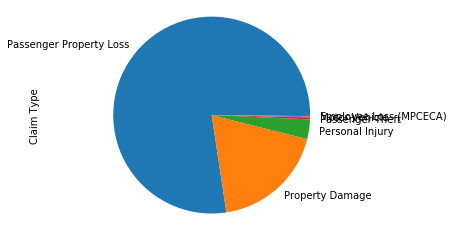

In [40]:
print(df_tsa_out['Claim Type'].value_counts())
type_count= df_tsa_out['Claim Type'].value_counts()
type_count.plot(kind='pie')
plt.axis('equal')
plt.show()

In [41]:
df_tsa_out[(df_tsa_out['Claim Type'] == 'Passenger Property Loss')]['Disposition'].value_counts()

Deny               2646
Settle              226
Approve in Full       1
Name: Disposition, dtype: int64

In [42]:
df_tsa_out[(df_tsa_out['Claim Type'] == 'Property Damage')]['Disposition'].value_counts()

Deny      575
Settle    138
Name: Disposition, dtype: int64

- Most of the Claim Type are of Passenger Property Loss
- Those with Claim Type Passenger Property Loss have a 92 percentage of being Denied by the TSA
- Those with Claim Type Property Damage have 19 percentage of being Settled by the TSA

In [43]:
data_dash = df_tsa_out.copy()
data_dash.dropna(inplace = True)

In [44]:
np.random.seed(101)

In [45]:
data_tsa = data_dash.sample(n=1000, random_state = np.random.seed(101))

In [46]:
data_tsa.reset_index()

,index,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition,Day Differences,Amount Differences,month,month_name
0,23165,2006101013808,2006-10-03,2006-09-21 00:00:00,SAN,San Diego International,Alaska Airlines,Passenger Property Loss,Checked Baggage,Computer - Laptop; Video Recordings (blank & c...,1200.00,Denied,0.0,Deny,12.0,1200.00,9.0,September
1,26416,2007061126701,2007-06-07,2007-04-16 00:00:00,JFK,John F. Kennedy International,American Airlines,Passenger Property Loss,Checked Baggage,Computer - Laptop,1726.99,Denied,0.0,Deny,52.0,1726.99,4.0,April
2,36090,2009111765441,2009-12-11,2009-10-28 10:13:00,DEN,Denver International Airport,Frontier Airlines,Passenger Property Loss,Checked Baggage,Decorations - Christmas; Birthday; etc.; Medic...,1280.00,Denied,0.0,Deny,43.0,1280.00,10.0,October
3,34167,2009051958919,2009-05-04,2009-04-13 00:00:00,BOS,Boston (Logan) International Airport,Jet Blue,Passenger Property Loss,Checkpoint,Jewelry - Fine,2950.00,Denied,0.0,Deny,21.0,2950.00,4.0,April
4,33460,2009031056027,2009-02-13,2008-12-11 00:00:00,JFK,John F. Kennedy International,Jet Blue,Passenger Property Loss,Checked Baggage,Cameras - Digital; Jewelry - Fine,1225.47,Denied,0.0,Deny,64.0,1225.47,12.0,December
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,25715,2007041323988,2007-04-11,2007-04-08 00:00:00,FLL,Ft. Lauderdale-Hollywood International,Frontier Airlines,Passenger Property Loss,Checked Baggage,Jewelry - Costume; Jewelry - Fine,2237.00,Denied,0.0,Deny,3.0,2237.00,4.0,April
996,18986,2005120797259,2005-11-28,2005-11-13 00:00:00,TPA,Tampa International,Independence Air,Passenger Property Loss,Checked Baggage,Cameras - Digital; DVD/CD Players,1061.00,Denied,0.0,Deny,15.0,1061.00,11.0,November
997,30346,2008031140781,2008-04-15,2008-01-29 00:00:00,BWI,Baltimore/Washington Intl Thurgood Marshall,Southwest Airlines,Passenger Property Loss,Checkpoint,Jewelry - Fine,1088.00,Denied,0.0,Deny,77.0,1088.00,1.0,January
998,13172,2005012474050,2004-12-28,2004-12-06 00:00:00,HOU,William P. Hobby,Southwest Airlines,Passenger Property Loss,Checked Baggage,Other,900.00,Denied,0.0,Deny,22.0,900.00,12.0,December


In [47]:
data_tsa.to_csv('datatsa.csv', index = False)